student_pass_fail_dataset.csv not found. Generating a dummy dataset.
Dummy dataset 'student_pass_fail_dataset.csv' created.
   StudyHours  Attendance  InternalMarks  Pass
0           8          81             35     1
1           6          56             74     0
2           7          59             40     1
3           4          62             60     0
4           2          67             47     1

Model Accuracy: 0.5

Confusion Matrix:
 [[1 5]
 [5 9]]

Classification Report:
               precision    recall  f1-score   support

           0       0.17      0.17      0.17         6
           1       0.64      0.64      0.64        14

    accuracy                           0.50        20
   macro avg       0.40      0.40      0.40        20
weighted avg       0.50      0.50      0.50        20


Model saved as model.pkl
Scaler saved as scaler.pkl


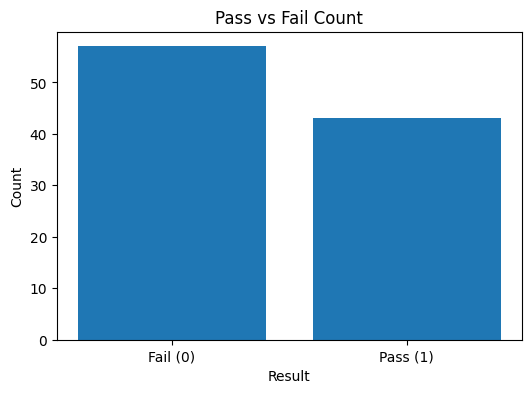

In [19]:
# Student Pass/Fail Classification Model
# -------------------------------------

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import pickle

# ---------------------------------
# Generate Dummy Dataset if not found
# ---------------------------------
try:
    df = pd.read_csv("student_pass_fail_dataset.csv")
    print("Dataset Loaded Successfully!")
except FileNotFoundError:
    print("student_pass_fail_dataset.csv not found. Generating a dummy dataset.")
    data = {
        'StudyHours': np.random.randint(1, 10, 100),
        'Attendance': np.random.randint(50, 100, 100),
        'InternalMarks': np.random.randint(30, 90, 100),
        'Pass': np.random.randint(0, 2, 100) # 0 for Fail, 1 for Pass
    }
    df = pd.DataFrame(data)
    df.to_csv("student_pass_fail_dataset.csv", index=False)
    print("Dummy dataset 'student_pass_fail_dataset.csv' created.")

print(df.head())

# -----------------------------
# 2. Split Data
# -----------------------------
X = df[["StudyHours", "Attendance", "InternalMarks"]]
y = df["Pass"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# -----------------------------
# 3. Feature Scaling
# -----------------------------
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# -----------------------------
# 4. Train Model
# -----------------------------
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

# -----------------------------
# 5. Predictions & Accuracy
# -----------------------------
y_pred = model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)

print("\nModel Accuracy:", accuracy)
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# -----------------------------
# 6. Save Model and Scaler
# -----------------------------
with open("model.pkl", "wb") as file:
    pickle.dump(model, file)

with open("scaler.pkl", "wb") as file:
    pickle.dump(scaler, file)

print("\nModel saved as model.pkl")
print("Scaler saved as scaler.pkl")

# -----------------------------
# 7. Visualization
# -----------------------------
plt.figure(figsize=(6,4))
plt.bar(["Fail (0)", "Pass (1)"], df["Pass"].value_counts())
plt.title("Pass vs Fail Count")
plt.xlabel("Result")
plt.ylabel("Count")
plt.show()

In [1]:
import matplotlib.pyplot as plt

# Example: generate and save multiple plots
data = {
    "Semester 1": [10, 20, 25, 30],
    "Semester 2": [15, 18, 22, 28],
    "Semester 3": [12, 25, 27, 35]
}

for i, (label, scores) in enumerate(data.items(), start=1):
    plt.figure(figsize=(6,4))
    plt.plot(range(1, len(scores)+1), scores, marker='o')
    plt.title(f"Performance - {label}")
    plt.xlabel("Exam")
    plt.ylabel("Score")
    plt.grid(True)

    # Save each plot with a unique filename
    filename = f"performance_plot_{i}.png"
    plt.savefig(filename, dpi=300, bbox_inches='tight')
    plt.close()  # Close the figure to avoid overlap


In [18]:
from google.colab import files

# Example: download multiple plots one by one
files.download("performance_plot_1.png")
files.download("performance_plot_2.png")
files.download("performance_plot_3.png")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>